3D modeling options
===================
This Notebook is to showcase and test implemented features with 3D molecular
structure rendering. The experimental data is unimportant.

I will make an effort to keep the syntax consistent, but the default plot
styles may change in the future.

Current limitations
-------------------
* Plots don't appear if the first O5' atom is missing.
  * This is an issue in 3Dmol.js and is not likely to be fixed.
* For now, plots only display one chain, whichever is given or " " by default.

Notebook set-up
---------------

In [1]:
import starmapper as MaP

Initializing MaP sample
-----------------------
If you have consistently named files, you can use a function to create to create the Sample objects.

In [2]:
path = 'data/'

def return_sample(sample):
    return MaP.Sample(sample       = sample,
                      profile      = f"{path}{sample}_rnasep_profile.txt",
                      ct           = f"{path}RNaseP.ct",
                      ss           = f"{path}RC_CRYSTAL_STRUCTURE.xrna",
                      rings        = f"{path}{sample}-rnasep.corrs",
                      pairs        = f"{path}{sample}-rnasep-pairmap.txt",
                      log          = f"{path}{sample}_shapemapper_log.txt",
                      dance_prefix = f"{path}{sample}_rnasep",
                      deletions    = f"{path}example-rnasep-deletions.txt",
                      fasta        = f"{path}RNaseP-noSC.fasta",
                      pdb          = f"{path}3dhs_Correct.pdb",
                      pdb_kwargs   = {"chain":"A"})

example1 = return_sample("example1")
example2 = return_sample("example2")
example3 = return_sample("example3")
example4 = return_sample("example4")

To plot a single sample, run sample_name.make_mol(). By default, nucleotides will be colored by their identity.
- A: darker blue
- U: lighter blue
- G: darker red
- C: lighter red

In [3]:
example2.make_mol();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

We can use the options of this function to add data to our drawing:
- ij="rings" Plots RInG-MaP correlations as lines connecting two nucleotides.
- postitive_only=True displays only positive correlations.
- Statistic_ge=23 keeps only correlations with a statistic greater or equal (ge) to 23.
- nt_color="profile" colors nucleotides by their reactivity.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

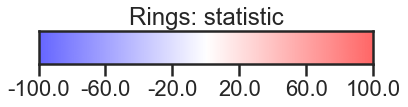

In [4]:
example2.make_mol(ij="rings", positive_only=True, Statistic_ge=23, nt_color="profile")

We can simultaneously plot multiple filtering parameters using sample_name.make_mol_multifilter().
The first argument should be a list of dictionaries. Each dictionary contains the ij data and filtering scheme to plot.
The second and third dictionary below differ only in the metric being displayed. Distance for the second and the default metric for deletions, Percentile, for the third.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

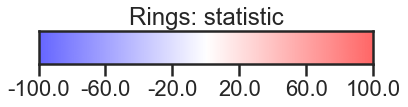

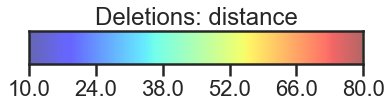

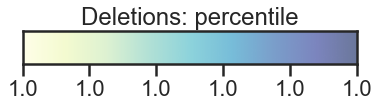

In [5]:
example2.make_mol_multifilter([{"ij":"rings", "Statistic":20},
                               {"ij":"deletions", "metric":"Distance", "Percentile_ge":0.99},
                               {"ij":"deletions", "Percentile_ge":0.99}])

Finally, we can simultaneously display multiple samples by calling MaP.array_mol() and passing a list of sample names as the first argument.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

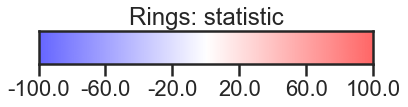

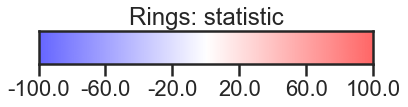

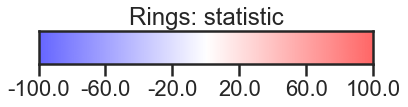

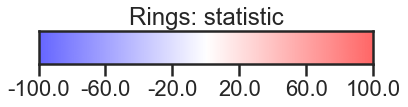

In [6]:
MaP.array_mol([example1, example2, example3, example4], ij="rings", positive_only=True, cdAbove=10, nt_color="profile")